In [93]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
x_train = x_train.reshape((-1, 784))  # Flatten the images
x_test = x_test.reshape((-1, 784))    # Flatten the images

# Create a simple linear neural network model for image classification
model = models.Sequential([
    layers.Dense(20, input_shape=(784,), activation='relu', use_bias=False),  # Linear layer without activation
    layers.Dense(10, activation='softmax', use_bias=False)  # Output layer with 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4239 - accuracy: 0.8845 - val_loss: 0.2592 - val_accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2447 - accuracy: 0.9315 - val_loss: 0.2143 - val_accuracy: 0.9384
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2100 - accuracy: 0.9402 - val_loss: 0.1973 - val_accuracy: 0.9407
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1886 - accuracy: 0.9454 - val_loss: 0.1849 - val_accuracy: 0.9448
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1702 - accuracy: 0.9506 - val_loss: 0.1703 - val_accuracy: 0.9502
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1552 - accuracy: 0.9554 - val_loss: 0.1595 - val_accuracy: 0.9546
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1440 - accuracy: 0.9582 - val_loss: 0.1607 - val_accuracy:

In [ ]:
#Chat GPT model

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split training data to training and validation
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)


## Transformer model

In [7]:
from tensorflow.keras import layers, models
import tensorflow as tf

def create_vit_classifier():
    num_patches = (28 // 4) * (28 // 4)  # 7x7 patches, 49 total
    patch_dim = 4 * 4 * 1  # Each patch is 4x4 pixels, 1 grayscale channel
    num_heads = 2  # Reduced from 4 to 2
    transformer_layers = 1  # Reduced from 4 to 2
    projection_dim = 32  # Reduced from 64 to 32

    inputs = layers.Input(shape=(28, 28, 1))

    # Break image into patches and flatten
    patches = layers.Conv2D(filters=projection_dim, kernel_size=4, strides=4, padding='valid')(inputs)
    patches = layers.Reshape((num_patches, projection_dim))(patches)  # Flatten patches

    # Transformer Encoder
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(patches)
        # Multi-head attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection
        x2 = layers.Add()([attention_output, patches])
        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP
        x3 = layers.Dense(units=projection_dim, activation=tf.nn.gelu)(x3)  # Simplified to match projection_dim
        x3 = layers.Dropout(0.1)(x3)
        # Skip connection 2
        patches = layers.Add()([x3, x2])

    # Classification head
    sequence_representation = layers.LayerNormalization(epsilon=1e-6)(patches)
    sequence_representation = layers.Flatten()(sequence_representation)
    sequence_representation = layers.Dropout(0.5)(sequence_representation)
    outputs = layers.Dense(10, activation="softmax")(sequence_representation)

    # Build model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model


mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Create and compile the ViT model
model = create_vit_classifier()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=1, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)


313/313 [==============================] - 2s 5ms/step - loss: 0.1660 - accuracy: 0.9520
Test accuracy: 0.9520000219345093


In [8]:
tflite_model_name = 'transformer_mnist'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
            # Ensure the input is cast to float32, as expected by the TensorFlow model
            yield [tf.cast(input_value, dtype=tf.float32)]

    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmplzaf46a9\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmplzaf46a9\assets
C:\Users\Sever\AppData\Roaming\Python\Python38\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


49600

In [11]:
def create_approx_vit():
    model = models.Sequential()
    model.add(layers.Input(shape=(28, 28, 1)))

    # Patch extraction and embedding using depthwise separable convolutions
    model.add(layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(16, (1, 1), activation='relu'))  # Pointwise convolution
    model.add(layers.BatchNormalization())

    # Additional lightweight attention mechanism
    model.add(layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(32, (1, 1), activation='relu'))  # Simulate channel-wise interactions
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.BatchNormalization())

    # Flatten and classify
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = create_approx_vit()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_split=0.1)
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


Epoch 1/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.2384 - accuracy: 0.9259 - val_loss: 0.0637 - val_accuracy: 0.9818
Epoch 2/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0852 - accuracy: 0.9746 - val_loss: 0.0591 - val_accuracy: 0.9853
Epoch 3/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0605 - val_accuracy: 0.9840
Epoch 4/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0483 - val_accuracy: 0.9853
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0571 - val_accuracy: 0.9873
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0524 - val_accuracy: 0.9893
Epoch 7/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0639 -

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp40o_lgt6\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp40o_lgt6\assets


In [12]:
tflite_model_name = 'transformer_approx_mnist'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
            # Ensure the input is cast to float32, as expected by the TensorFlow model
            yield [tf.cast(input_value, dtype=tf.float32)]

    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmporid8ad2\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmporid8ad2\assets
C:\Users\Sever\AppData\Roaming\Python\Python38\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


411560

## Normal trained version for the MCU


In [228]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Create a more compact CNN model
model = models.Sequential([
    layers.Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),  # Reduced number of neurons
    layers.Dropout(0.2),  # Helps prevent overfitting, does not affect model size
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)


Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3535 - accuracy: 0.8886 - val_loss: 0.0829 - val_accuracy: 0.9762
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1323 - accuracy: 0.9606 - val_loss: 0.0584 - val_accuracy: 0.9823
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1037 - accuracy: 0.9690 - val_loss: 0.0549 - val_accuracy: 0.9840
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0863 - accuracy: 0.9746 - val_loss: 0.0459 - val_accuracy: 0.9865
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0769 - accuracy: 0.9765 - val_loss: 0.0454 - val_accuracy: 0.9870
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.0475 - val_accuracy: 0.9852
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0606 - accuracy: 0.9806 - val_loss: 0.0448 - val_ac

## Fine-tune with augmented data set

In [229]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Adjust the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with a potentially lower learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2352 - accuracy: 0.9277 - val_loss: 0.0417 - val_accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1716 - accuracy: 0.9467 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1516 - accuracy: 0.9533 - val_loss: 0.0358 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1344 - accuracy: 0.9589 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1308 - accuracy: 0.9602 - val_loss: 0.0376 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1236 - accuracy: 0.9627 - val_loss: 0.0552 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1196 - accuracy: 0.9639 - val_loss: 0.0344 -

In [230]:
tflite_model_name = 'classification'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
            # Ensure the input is cast to float32, as expected by the TensorFlow model
            yield [tf.cast(input_value, dtype=tf.float32)]

    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmpfnfatqdb\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmpfnfatqdb\assets
C:\Users\Sever\AppData\Roaming\Python\Python38\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


19184

In [27]:
# Write TFLite model to a C source (or header) file
with open('modified_data' + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'modified_data'))

In [28]:
import tensorflow as tf
import numpy as np

def load_model(tflite_model_path):
    # Load TFLite model and allocate tensors
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()
    return interpreter

def calculate_macs(interpreter):
    macs = 0
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Iterate over all operations
    for detail in interpreter.get_tensor_details():
        # Check for convolutional layers
        if 'Conv2D' in detail['name']:
            # Assuming the weights are of the shape [filter_height, filter_width, in_channels, out_channels]
            weight_shape = interpreter.get_tensor(detail['index']).shape
            output_shape = interpreter.get_tensor(output_details[0]['index']).shape  # Output shape of the model
            # MACs for convolution
            current_macs = (np.prod(weight_shape) * output_shape[1] * output_shape[2])
            macs += current_macs
            print(f"Layer: {detail['name']}, MACs: {current_macs}")

        # Check for dense layers
        elif 'MatMul' in detail['name']:  # 'MatMul' is used in TFLite for dense layers
            # weight shape is [input_channels, output_channels]
            weight_shape = interpreter.get_tensor(detail['index']).shape
            # MACs for dense layers
            current_macs = np.prod(weight_shape)
            macs += current_macs
            print(f"Layer: {detail['name']}, MACs: {current_macs}")

    return macs

# Example usage
model_path = 'modified_data.tflite'
interpreter = load_model(model_path)
total_macs = calculate_macs(interpreter)
print(f"Total MACs in the model: {total_macs}")

IndexError: tuple index out of range

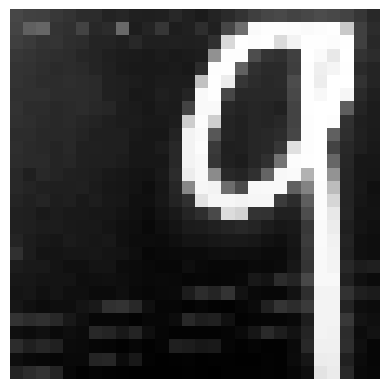

Predicted Class: 4
output: [[-128 -127 -128 -128   87 -128 -128 -126 -127  -91]]
signed char webcam_image[] = {
   -65, -69, -70, -76, -80, -85, -85, -93, -90, -95, -96, -95, -89, -95, -99, -93, -87, -80, -71, -66, -63, -68, -65, -61, -64, -68, -78, -89,
   -67, -46, -41, -80, -82, -68, -89, -86, -39, -97, -92, -78, -97, -94, -84, -94, -66, -35, 73, 75, 75, 74, 73, 74, 76, 35, -70, -85,
   -71, -75, -80, -79, -84, -85, -91, -91, -94, -89, -96, -96, -94, -96, -94, -83, 47, 77, 75, 76, 49, 68, 76, 76, 74, 76, -70, -89,
   -77, -79, -83, -84, -85, -90, -92, -96, -98, -99, -100, -98, -100, -99, -97, -8, 75, 75, -60, -79, -83, -70, 77, 73, 59, 77, -80, -86,
   -80, -81, -84, -87, -85, -87, -91, -94, -99, -100, -100, -100, -99, -101, -86, 75, 76, -44, -83, -87, -87, -72, 76, 64, 69, 76, -87, -91,
   -80, -82, -85, -86, -84, -86, -87, -94, -96, -98, -100, -98, -98, -98, 29, 76, 63, -78, -85, -89, -87, -61, 76, 63, 77, 77, -81, -91,
   -82, -83, -83, -85, -85, -85, -87, -94, -96, -101, -100, -

In [235]:
#VERSION FOR CNN INFERENCE

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def capture_and_preprocess_image_cnn():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise IOError("Cannot capture image from webcam")

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume largest contour is the number
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Crop and resize the image around the number
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, (28, 28))

    else:
        resized = cv2.resize(gray, (28, 28))  # Default resizing if no contours

    # Normalize the image
    normalized_resized = resized / 255.0

    # Show the processed image
    plt.imshow(normalized_resized, cmap='gray')
    plt.axis('off')
    plt.show()

    # Reshape the 28x28 image to 28x28x1
    return normalized_resized.reshape(28, 28, 1)


# Prepare the image from webcam
input_data = capture_and_preprocess_image_cnn()

# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]['quantization']

# Quantize the webcam image
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]['dtype'])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], [quantized_input_data])

# Run the model
interpreter.invoke()

# Get the output details and extract output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")
# Print the quantized image data as a C array
print("signed char webcam_image[] = {")
for row in quantized_input_data.reshape(28, 28):
    print("   " + ', '.join(map(str, row)) + ',')
print("};")


## Version with Fine-Tuning on self-collected Data

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output


def capture_and_preprocess_image_cnn():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise IOError("Cannot capture image from webcam")

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume largest contour is the number
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Crop and resize the image around the number
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, (28, 28))
    else:
        resized = cv2.resize(gray, (28, 28))  # Default resizing if no contours

    # Normalize the image
    normalized_resized = resized / 255.0

    # Show the processed image
    clear_output(wait=True)
    plt.imshow(normalized_resized, cmap='gray')
    plt.axis('off')
    plt.show()

    # Reshape the 28x28 image to 28x28x1
    return normalized_resized.reshape(28, 28, 1)

def append_save_data(images, labels, directory="dataset"):
    """ Append new images and labels to existing `.npy` files. """
    if not os.path.exists(directory):
        os.makedirs(directory)  # Ensure directory exists

    images_path = os.path.join(directory, "images.npy")
    labels_path = os.path.join(directory, "labels.npy")

    # Load existing data if it exists
    if os.path.exists(images_path) and os.path.exists(labels_path):
        existing_images = np.load(images_path)
        existing_labels = np.load(labels_path)
        images = np.concatenate((existing_images, images))
        labels = np.concatenate((existing_labels, labels))

    # Save updated arrays
    np.save(images_path, images)
    np.save(labels_path, labels)
    print("Data successfully appended and saved to disk.")

def collect_data_for_tuning(num_iterations=10, delay=5, save_interval=10):
    collected_images = []
    collected_labels = []
    digit = 7  # Iterate over each digit class
    for i in range(num_iterations):
        try:
            processed_image = capture_and_preprocess_image_cnn()
            # For demo purposes, use the expected digit as the label
            label = digit
            collected_images.append(processed_image)
            collected_labels.append(label)
            print(f"Data collected for {label}: {i + 1}/{num_iterations} of digit {digit}")
        except Exception as e:
            print(f"Failed to capture image on iteration {i + 1} for digit {digit}: {str(e)}")
            continue

        if (i + 1) % save_interval == 0:
            append_save_data(np.array(collected_images), np.array(collected_labels), "seven")
            collected_images, collected_labels = [], []  # Reset the lists after saving

        time.sleep(delay)
    
    # Save any remaining data not yet saved
    if collected_images:
        append_save_data(np.array(collected_images), np.array(collected_labels))

def load_data(directory="dataset"):
    images = np.load(os.path.join(directory, "images.npy"))
    labels = np.load(os.path.join(directory, "labels.npy"))
    print("Data loaded from disk.")
    return images, labels
# Example of how to use the function
data_with_labels_full = collect_data_for_tuning()


In [4]:
new_images_0, new_labels_0 = load_data("zero")
new_images_1, new_labels_1 = load_data("one")
new_images_2, new_labels_2 = load_data("two")
new_images_3, new_labels_3 = load_data("three")
new_images_4, new_labels_4 = load_data("four")
new_images_5, new_labels_5 = load_data("five")
new_images_6, new_labels_6 = load_data("six")
new_images_7, new_labels_7 = load_data("seven")
new_images_8, new_labels_8 = load_data("eight")
new_images_9, new_labels_9 = load_data("nine")

Data loaded from disk.
Data loaded from disk.
Data loaded from disk.
Data loaded from disk.
Data loaded from disk.
Data loaded from disk.
Data loaded from disk.
Data loaded from disk.
Data loaded from disk.
Data loaded from disk.


In [9]:
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
    plt.show()

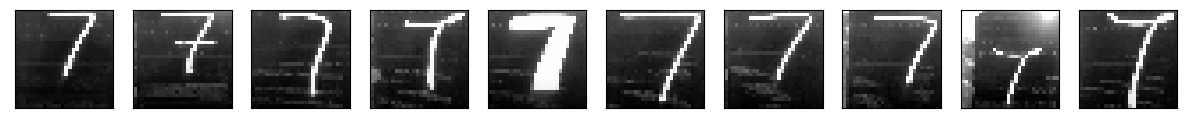

In [12]:
plot_images(new_images_7, new_labels_7)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

x_train = np.concatenate((x_train, new_images_0, new_images_1, new_images_2, new_images_3, new_images_4, new_images_5, new_images_6, new_images_7, new_images_8, new_images_9))
y_train = np.concatenate((y_train, new_labels_0, new_labels_1, new_labels_2, new_labels_3,new_labels_4, new_labels_5, new_labels_6, new_labels_7,  new_labels_8, new_labels_9 ))

# Create an array of indices and shuffle it
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)

# Use the shuffled indices to reorder the training data and labels
x_train = x_train[indices]
y_train = y_train[indices]

# Create a more compact CNN model
model = models.Sequential([
    layers.Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),  # Reduced number of neurons
    layers.Dropout(0.2),  # Helps prevent overfitting, does not affect model size
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)


Epoch 1/10
1693/1693 [==============================] - 11s 6ms/step - loss: 0.3600 - accuracy: 0.8887 - val_loss: 0.1119 - val_accuracy: 0.9641
Epoch 2/10
1693/1693 [==============================] - 11s 7ms/step - loss: 0.1376 - accuracy: 0.9580 - val_loss: 0.0808 - val_accuracy: 0.9751
Epoch 3/10
1693/1693 [==============================] - 12s 7ms/step - loss: 0.1097 - accuracy: 0.9668 - val_loss: 0.0691 - val_accuracy: 0.9769
Epoch 4/10
1693/1693 [==============================] - 11s 7ms/step - loss: 0.0901 - accuracy: 0.9730 - val_loss: 0.0589 - val_accuracy: 0.9819
Epoch 5/10
1693/1693 [==============================] - 11s 7ms/step - loss: 0.0789 - accuracy: 0.9749 - val_loss: 0.0550 - val_accuracy: 0.9811
Epoch 6/10
1693/1693 [==============================] - 12s 7ms/step - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0554 - val_accuracy: 0.9829
Epoch 7/10
1693/1693 [==============================] - 12s 7ms/step - loss: 0.0616 - accuracy: 0.9811 - val_loss: 0.0520 - val_ac

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Adjust the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with a potentially lower learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/10
1880/1880 [==============================] - 25s 13ms/step - loss: 0.2302 - accuracy: 0.9299 - val_loss: 0.0376 - val_accuracy: 0.9870
Epoch 2/10
1880/1880 [==============================] - 23s 12ms/step - loss: 0.1635 - accuracy: 0.9501 - val_loss: 0.0375 - val_accuracy: 0.9876
Epoch 3/10
1880/1880 [==============================] - 23s 12ms/step - loss: 0.1448 - accuracy: 0.9560 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 4/10
1880/1880 [==============================] - 24s 13ms/step - loss: 0.1266 - accuracy: 0.9610 - val_loss: 0.0385 - val_accuracy: 0.9866
Epoch 5/10
1880/1880 [==============================] - 26s 14ms/step - loss: 0.1227 - accuracy: 0.9632 - val_loss: 0.0370 - val_accuracy: 0.9876
Epoch 6/10
1880/1880 [==============================] - 25s 13ms/step - loss: 0.1148 - accuracy: 0.9649 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 7/10
1880/1880 [==============================] - 25s 13ms/step - loss: 0.1104 - accuracy: 0.9663 - val_loss: 0.0334 -

In [25]:
tflite_model_name = 'modified_data'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
            # Ensure the input is cast to float32, as expected by the TensorFlow model
            yield [tf.cast(input_value, dtype=tf.float32)]

    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp_ur_sbi_\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp_ur_sbi_\assets
C:\Users\Sever\AppData\Roaming\Python\Python38\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


19152

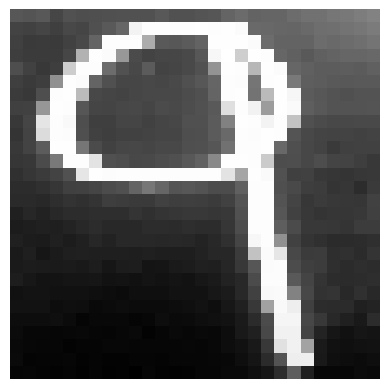

Predicted Class: 9
output: [[-128 -128 -128 -128  -49 -128 -128 -128 -127   49]]
signed char webcam_image[] = {
   -30, -32, -29, -45, -34, -38, -37, -36, -35, -35, -34, -29, -35, -34, -32, -31, -18, -11, -19, -17, -17, -10, -5, -5, -1, 1, 5, 10,
   -48, -49, -46, -52, -43, -46, -36, -27, -16, 114, 123, 123, 123, 123, 124, 123, 124, 121, -12, -14, -16, -17, -13, -9, -8, -4, -1, 3,
   -51, -56, -55, -56, -49, -43, -18, 123, 123, 123, 48, -28, -30, -26, -19, 124, 124, 124, 121, -10, -19, -19, -19, -10, -12, -10, -8, -3,
   -53, -55, -55, -55, -45, 54, 124, 121, 30, -41, -48, -45, -45, -42, -30, 117, 125, 80, 124, 123, -16, -21, -27, -21, -19, -16, -16, -14,
   -38, -49, -57, -53, 79, 123, 123, -10, -35, -43, -26, -48, -46, -42, -35, 25, 124, 123, 58, 124, 121, -16, -21, -25, -25, -24, -26, -21,
   -52, -56, -53, 23, 123, 121, -18, -36, -45, -45, -43, -45, -42, -36, -30, -17, 123, 122, -2, 123, 124, 2, -23, -25, -28, -29, -28, -28,
   -55, -57, -38, 123, 124, 62, -43, -46, -48, -45, -43, 

In [440]:
#VERSION FOR CNN INFERENCE

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def capture_and_preprocess_image_cnn():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise IOError("Cannot capture image from webcam")

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume largest contour is the number
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Crop and resize the image around the number
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, (28, 28))

    else:
        resized = cv2.resize(gray, (28, 28))  # Default resizing if no contours

    # Normalize the image
    normalized_resized = resized / 255.0

    # Show the processed image
    plt.imshow(normalized_resized, cmap='gray')
    plt.axis('off')
    plt.show()

    # Reshape the 28x28 image to 28x28x1
    return normalized_resized.reshape(28, 28, 1)


# Prepare the image from webcam
input_data = capture_and_preprocess_image_cnn()

# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='modified_data.tflite')
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]['quantization']

# Quantize the webcam image
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]['dtype'])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], [quantized_input_data])

# Run the model
interpreter.invoke()

# Get the output details and extract output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")
# Print the quantized image data as a C array
print("signed char webcam_image[] = {")
for row in quantized_input_data.reshape(28, 28):
    print("   " + ', '.join(map(str, row)) + ',')
print("};")


In [26]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

## Train with Augmented Data

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Adjust the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with a potentially lower learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2034 - accuracy: 0.9378 - val_loss: 0.0357 - val_accuracy: 0.9881
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1664 - accuracy: 0.9492 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1468 - accuracy: 0.9552 - val_loss: 0.0371 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1366 - accuracy: 0.9579 - val_loss: 0.0345 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1263 - accuracy: 0.9614 - val_loss: 0.0409 - val_accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1240 - accuracy: 0.9631 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1177 - accuracy: 0.9643 - val_loss: 0.0361 -

## Quantize the model

In [154]:
tflite_model_name = 'classification'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
            # Ensure the input is cast to float32, as expected by the TensorFlow model
            yield [tf.cast(input_value, dtype=tf.float32)]

    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp9hc75fa5\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp9hc75fa5\assets
C:\Users\Sever\AppData\Roaming\Python\Python38\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


19152

## Evaluate the Model

In [17]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors
tflite_model_path = 'classification.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Helper function to run inference on a single image
def run_tflite_inference_single_image(image):
    # Get the scale and zero point of the input tensor
    input_scale, input_zero_point = input_details[0]['quantization']
    
    # Adjust the image data type and scale it according to quantization parameters
    if input_details[0]['dtype'] == np.int8:
        image = image / input_scale + input_zero_point
        image = np.int8(image)  # Ensure the type is int8

    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    return output


# Function to evaluate the TFLite model on the entire test dataset
def evaluate_tflite_model(x_test, y_test):
    correct_predictions = 0
    for i in range(len(x_test)):
        test_image = x_test[i].reshape(1, 28, 28, 1)  # Reshape the image to [1, 28, 28, 1] if needed
        output = run_tflite_inference_single_image(test_image)
        predicted_label = np.argmax(output)
        if predicted_label == y_test[i]:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(x_test)
    return accuracy

# Calculate the TFLite model accuracy
tflite_accuracy = evaluate_tflite_model(x_test, y_test)
print("Original TF Model Accuracy:", accuracy)  # Assuming `accuracy` was from your earlier `model.evaluate`
print("Quantized TFLite Model Accuracy:", tflite_accuracy)



Original TF Model Accuracy: 0.9869999885559082
Quantized TFLite Model Accuracy: 0.9868


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

def capture_and_preprocess_image(threshold=120):
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise IOError("Cannot capture image from webcam")

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding directly after capturing the image
    # Pixels below the threshold are set to black (0)
    mask = gray < threshold
    gray[mask] = 0

    # Resize the image to 28x28
    resized = cv2.resize(gray, (28, 28))

    # Show the image without axes
    plt.imshow(resized, cmap='gray')
    plt.axis('off')
    plt.savefig('webcam_image.png', bbox_inches='tight', pad_inches=0)
    plt.show()

    # Normalize the image
    resized = resized / 255.0

    # Flatten the 28x28 image to a 784 vector
    return resized.flatten()

# Prepare the image from webcam
input_data = capture_and_preprocess_image()

# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_scale, input_zero_point = input_details[0]["quantization"]

# Quantize the webcam image
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]["dtype"])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], [quantized_input_data])

# Run the model
interpreter.invoke()

# Extract and process the output
output_data = interpreter.get_tensor(output_details[0]['index'])
output_scale, output_zero_point = output_details[0]["quantization"]
dequantized_output = (output_data - output_zero_point) * output_scale
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")

# Print the quantized image data as a C array
print("signed char webcam_image[] = {")
for row in quantized_input_data.reshape(28, 28):  # Reshape flat array back to 28x28 for printing
    print("   " + ', '.join(map(str, row)) + ',')
print("};")

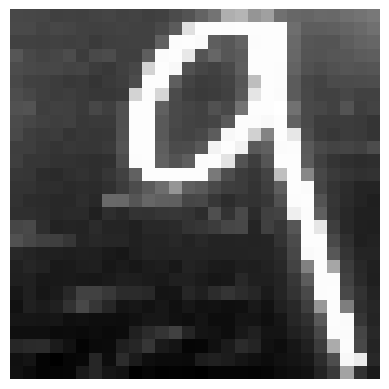

ValueError: Cannot set tensor: Dimension mismatch. Got 2 but expected 4 for input 0.

In [142]:
#Denoised version

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def capture_and_preprocess_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise IOError("Cannot capture image from webcam")

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume largest contour is the number
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Crop and resize the image around the number
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, (28, 28))

    else:
        resized = cv2.resize(gray, (28, 28))  # Default resizing if no contours

    # Normalize the image
    normalized_resized = resized / 255.0
    # Show the processed image
    plt.imshow(normalized_resized, cmap='gray')
    plt.axis('off')
    plt.show()

    # Flatten the 28x28 image to a 784 vector
    return normalized_resized.flatten()

# Prepare the image from webcam
input_data = capture_and_preprocess_image()

# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]['quantization']

# Quantize the webcam image
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]['dtype'])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], [quantized_input_data])

# Run the model
interpreter.invoke()

# Get the output details and extract output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")
# Print the quantized image data as a C array
print("signed char webcam_image[] = {")
for row in quantized_input_data.reshape(28, 28):
    print("   " + ', '.join(map(str, row)) + ',')
print("};")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

def capture_and_preprocess_image_cnn():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise IOError("Cannot capture image from webcam")

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, (28, 28), interpolation=cv2.INTER_AREA)
    else:
        resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    normalized_resized = resized / 255.0
    plt.imshow(normalized_resized, cmap='gray')
    plt.axis('off')
    plt.show()

    return normalized_resized.reshape(28, 28, 1)

def collect_data_for_tuning(num_iterations=50, delay=8):
    collected_data = []
    for i in range(num_iterations):
        try:
            processed_image = capture_and_preprocess_image_cnn()
            collected_data.append((processed_image, 9))
            print(f"Data collected: {i + 1}/{num_iterations}")
        except Exception as e:
            print(f"Failed to capture image on iteration {i + 1}: {str(e)}")
            continue
        time.sleep(delay)

    return collected_data

# Example of how to use the function
data_with_labels = collect_data_for_tuning()


In [117]:
# Assuming data_with_labels is a list of (image, label) tuples
new_images, new_labels = zip(*data_with_labels)

# Convert to NumPy arrays and ensure correct shape and type
new_images = np.array(new_images).reshape(-1, 28, 28, 1)
new_labels = np.array(new_labels)

# For simplicity, take a subset of the original training data
subset_x_train = x_train[:len(new_images)]
subset_y_train = y_train[:len(new_images)]

# Combine the datasets
combined_x_train = np.concatenate([subset_x_train, new_images])
combined_y_train = np.concatenate([subset_y_train, new_labels])

# Shuffle the dataset
indices = np.arange(combined_x_train.shape[0])
np.random.shuffle(indices)
combined_x_train = combined_x_train[indices]
combined_y_train = combined_y_train[indices]

# Continue training the model
model.fit(combined_x_train, combined_y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1/1 [==============================] - 0s 460ms/step - loss: 3.1297 - accuracy: 0.5000 - val_loss: 2.3624 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 26ms/step - loss: 3.1641 - accuracy: 0.4444 - val_loss: 2.0321 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 28ms/step - loss: 2.5555 - accuracy: 0.5000 - val_loss: 1.6955 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 30ms/step - loss: 1.5576 - accuracy: 0.5556 - val_loss: 1.4555 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 1.0266 - accuracy: 0.7222 - val_loss: 1.2694 - val_accuracy: 0.5000


## Perform Inference with Image caught from the camera

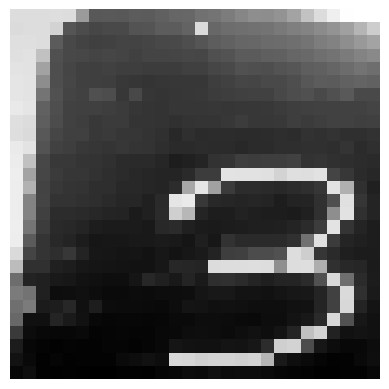

Predicted Class: 2
output: [[-128 -106    2 -127  -85 -124 -114 -127 -122  -93]]
signed char webcam_image[] = {
   92, 92, 92, 93, 92, 30, -32, -31, -32, -29, -30, -25, -19, -18, -8, -6, 1, 11, 18, 17, 24, 38, 67, 91, 109, 123, 124, 124,
   90, 92, 92, 82, -35, -44, -49, -45, -45, -37, -36, -29, -29, -22, 90, -18, -13, -11, -8, -7, -2, 4, 9, 15, 24, 35, 54, 77,
   94, 94, 92, -30, -47, -52, -55, -54, -51, -52, -50, -47, -46, -42, -35, -28, -23, -19, -18, -15, -14, -11, -6, 2, 7, 18, 28, 38,
   95, 96, 66, -40, -47, -48, -51, -49, -51, -55, -51, -51, -50, -48, -49, -40, -37, -30, -30, -26, -25, -19, -16, -11, -7, 0, 8, 13,
   98, 96, 37, -42, -50, -55, -56, -54, -57, -57, -58, -58, -58, -55, -55, -49, -46, -39, -41, -42, -37, -34, -27, -25, -20, -14, -7, -12,
   99, 98, 17, -42, -49, -55, -56, -57, -61, -64, -65, -64, -63, -63, -63, -57, -54, -49, -50, -46, -45, -42, -33, -29, -30, -24, -21, -23,
   99, 98, -6, -39, -51, -54, -40, -43, -63, -47, -64, -66, -64, -63, -62, -58, -57, -55, -

In [214]:
#VERSION FOR CNN INFERENCE

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def capture_and_preprocess_image_cnn():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise IOError("Cannot capture image from webcam")

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume largest contour is the number
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # Crop and resize the image around the number
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, (28, 28))

    else:
        resized = cv2.resize(gray, (28, 28))  # Default resizing if no contours

    # Normalize the image
    normalized_resized = resized / 255.0

    # Show the processed image
    plt.imshow(normalized_resized, cmap='gray')
    plt.axis('off')
    plt.show()

    # Reshape the 28x28 image to 28x28x1
    return normalized_resized.reshape(28, 28, 1)


# Prepare the image from webcam
input_data = capture_and_preprocess_image_cnn()

# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]['quantization']

# Quantize the webcam image
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]['dtype'])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], [quantized_input_data])

# Run the model
interpreter.invoke()

# Get the output details and extract output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")
# Print the quantized image data as a C array
print("signed char webcam_image[] = {")
for row in quantized_input_data.reshape(28, 28):
    print("   " + ', '.join(map(str, row)) + ',')
print("};")


In [75]:
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Load the image, convert to grayscale, and invert (if your model was trained on white-on-black images like MNIST)
    image = Image.open(image_path).convert('L')

    # Resize the image to 28x28 pixels
    image = image.resize((28, 28), Image.Resampling.LANCZOS)

    # Convert to numpy array and normalize
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize to range [0, 1]
    return image_array

# Path to your image
image_path = r'\Users\Sever\ML_on_MCU\images\three.png'  # Replace with your image path

# Load and preprocess the image
image_array = load_and_preprocess_image(image_path)

# Flatten the image to match the model's expected input shape (784,)
image_flattened = image_array.flatten()

# Load the TensorFlow Lite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input details and prepare the quantized input
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]["quantization"]
input_data = np.expand_dims(image_flattened, axis=0)  # Add batch dimension
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]["dtype"])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], quantized_input_data)

# Run the model
interpreter.invoke()

# Extract and process the output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Assuming output also uses quantization
output_scale, output_zero_point = output_details[0]["quantization"]
dequantized_output = (output_data - output_zero_point) * output_scale
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")

# Print the quantized image data as a C array
print("signed char mnist_image[] = {")
for row in quantized_input_data[0].reshape(28, 28):  # Reshape flat array back to 28x28 for printing
    print("   " + ', '.join(map(str, row)) + ',')
print("};")

# Show and save the preprocessed image for reference
plt.imshow(image_array, cmap='gray')
plt.show()  # Optionally display the image in a window


ValueError: Cannot set tensor: Dimension mismatch. Got 3 but expected 4 for input 0.

In [137]:
import numpy as np
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(_, _), (x_test, y_test) = mnist.load_data()
image = x_test[2]  # First image in the test dataset

# Normalize the image data
normalized_image = image / 255.0

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="classification.tflite")
interpreter.allocate_tensors()

# Get input details and quantization parameters
input_details = interpreter.get_input_details()
scale = input_details[0]['quantization'][0]
zero_point = input_details[0]['quantization'][1]

# Quantize the normalized image
quantized_image = np.round(normalized_image / scale + zero_point).astype(np.int8)

# Generate C array with rows
print("signed char test_image[] = {")
for row in quantized_image:
    row_string = ', '.join(map(str, row))
    print(f"    {row_string},")
print("};")


signed char test_image[] = {
    -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
    -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
    -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
    -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
    -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -90, 126, -19, -128, -128, -128, -128, -128, -128, -128, -128, -128,
    -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -41, 124, -46,

In [131]:
#FCN Inference
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST data
mnist = tf.keras.datasets.mnist
(_, _), (x_test, y_test) = mnist.load_data()

# Select the image index you want to use
image_index = 4  # Change this index to select a different image

# Normalize and prepare input data
x_test_normalized = x_test / 255.0
x_test_flattened = x_test_normalized.reshape((-1, 784))

# Load the TensorFlow Lite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input details and prepare the quantized input
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]["quantization"]

# Use the specified test image
input_data = x_test_flattened[image_index:image_index+1]  # Select one example and add batch dimension
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]["dtype"])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], quantized_input_data)

# Run the model
interpreter.invoke()

# Extract and process the output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Assuming output also uses quantization
output_scale, output_zero_point = output_details[0]["quantization"]
dequantized_output = (output_data - output_zero_point) * output_scale
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")

# Print the quantized image data as a C array
print("signed char mnist_image[] = {")
for row in quantized_input_data[0].reshape(28, 28):  # Reshape flat array back to 28x28 for printing
    print("   " + ', '.join(map(str, row)) + ',')
print("};")


plt.imshow(x_test[image_index], cmap='gray')
plt.title(f'Image Index {image_index}')
plt.savefig('mnist_image_index_{:04d}.png'.format(image_index))  # Saves the image
plt.show()  # Optionally display the image in a window

ValueError: Cannot set tensor: Dimension mismatch. Got 2 but expected 4 for input 0.

Predicted Class: 1
output: [[-128  127 -128 -128 -128 -128 -128 -128 -128 -128]]
signed char mnist_image[] = {
   -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
   -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
   -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
   -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
   -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -90, 126, -19, -128, -128, -128, -128, -128, -128, -128, -128, -128,
   -128, -128, -128, -128, -128, -128

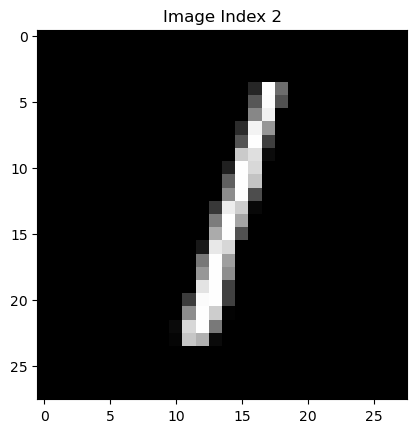

In [138]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST data
mnist = tf.keras.datasets.mnist
(_, _), (x_test, y_test) = mnist.load_data()

# Select the image index you want to use
image_index = 2  # Change this index to select a different image

# Normalize and prepare input data for a CNN
x_test_normalized = x_test / 255.0
x_test_reshaped = x_test_normalized.reshape((-1, 28, 28, 1))  # Reshape for CNN

# Load the TensorFlow Lite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input details and prepare the quantized input
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]["quantization"]

# Use the specified test image
input_data = x_test_reshaped[image_index:image_index+1]  # Select one example and add batch dimension
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]["dtype"])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], quantized_input_data)

# Run the model
interpreter.invoke()

# Extract and process the output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Assuming output also uses quantization
output_scale, output_zero_point = output_details[0]["quantization"]
dequantized_output = (output_data - output_zero_point) * output_scale
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")

# Print the quantized image data as a C array
print("signed char mnist_image[] = {")
for row in quantized_input_data[0].reshape(28, 28):  # Reshape flat array back to 28x28 for printing
    print("   " + ', '.join(map(str, row)) + ',')
print("};")

plt.imshow(x_test[image_index], cmap='gray')
plt.title(f'Image Index {image_index}')
plt.savefig('mnist_image_index_{:04d}.png'.format(image_index))  # Saves the image
plt.show()  # Optionally display the image in a window


In [116]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_model = converter.convert()

# open('classification' + '.tflite', 'wb').write(tflite_model)

In [14]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [15]:
# Write TFLite model to a C source (or header) file
with open('modified_data' + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'modified_data'))

In [126]:
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Load the image, convert to grayscale, and invert (if your model was trained on white-on-black images like MNIST)
    image = Image.open(image_path).convert('L')

    # Resize the image to 28x28 pixels
    image = image.resize((28, 28), Image.Resampling.LANCZOS)

    # Convert to numpy array and normalize
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize to range [0, 1]
    return image_array

# Path to your image
image_path = r'\Users\Sever\ML_on_MCU\images\three.png'  # Replace with your image path

# Load and preprocess the image
image_array = load_and_preprocess_image(image_path)

# Flatten the image to match the model's expected input shape (784,)
image_flattened = image_array.flatten()

# Load the TensorFlow Lite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='classification.tflite')
interpreter.allocate_tensors()

# Get input details and prepare the quantized input
input_details = interpreter.get_input_details()
input_scale, input_zero_point = input_details[0]["quantization"]
input_data = np.expand_dims(image_flattened, axis=0)  # Add batch dimension
quantized_input_data = np.round(input_data / input_scale + input_zero_point).astype(input_details[0]["dtype"])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], quantized_input_data)

# Run the model
interpreter.invoke()

# Extract and process the output
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Assuming output also uses quantization
output_scale, output_zero_point = output_details[0]["quantization"]
dequantized_output = (output_data - output_zero_point) * output_scale
predicted_class = np.argmax(output_data)
print(f"Predicted Class: {predicted_class}")
print(f"output: {output_data}")

# Print the quantized image data as a C array
print("signed char mnist_image[] = {")
for row in quantized_input_data[0].reshape(28, 28):  # Reshape flat array back to 28x28 for printing
    print("   " + ', '.join(map(str, row)) + ',')
print("};")

# Show and save the preprocessed image for reference
plt.imshow(image_array, cmap='gray')
plt.show()  # Optionally display the image in a window


ValueError: Cannot set tensor: Dimension mismatch. Got 2 but expected 4 for input 0.

## PRUNING


In [331]:
import numpy as np
import tensorflow as tf

def non_zero_weights_summary(model):
    """
    Prints a summary of the model showing only non-zero weights for each layer.

    Args:
    model (tf.keras.Model): The model to summarize.
    """
    print("Layer Name, Layer Type, Non-zero Weights")
    total_non_zero = 0
    for layer in model.layers:
        if hasattr(layer, 'weights') and len(layer.weights) > 0:
            non_zero_count = 0
            for weight in layer.get_weights():
                non_zero_count += np.count_nonzero(weight)
            print(f"{layer.name}, {type(layer).__name__}, {non_zero_count}")
            total_non_zero += non_zero_count
    print(f"Total non-zero weights in the model: {total_non_zero}")

In [332]:
import tensorflow as tf

def prune_weights_magnitude(original_model, threshold=0.01):
    """
    Prunes the model by setting weights below a certain threshold to zero.

    Args:
    original_model (tf.keras.Model): The trained Keras model.
    threshold (float): Threshold below which weights are set to zero.

    Returns:
    tf.keras.Model: A new model with pruned weights.
    """
    # Clone the model architecture
    new_model = tf.keras.models.clone_model(original_model)
    
    # Compile the new model with appropriate loss for regression
    new_model.compile(optimizer='adam', loss='mse')
    
    # Copy and prune the weights
    for layer in new_model.layers:
        if hasattr(layer, 'weights') and layer.weights:
            new_weights = []
            for w in layer.get_weights():
                # Prune weights below the threshold
                pruned_weights = tf.where(tf.abs(w) < threshold, tf.zeros_like(w), w)
                new_weights.append(pruned_weights.numpy())  # Convert to numpy array for inspection
            layer.set_weights(new_weights)
            
            # Debugging: Print the number of non-zero weights
            non_zero_count = np.count_nonzero(new_weights[0])
            total_count = np.size(new_weights[0])
            print(f"Layer {layer.name} has {non_zero_count} non-zero weights out of {total_count}")

    return new_model

In [71]:
import tensorflow as tf
import numpy as np

def prune_weights_magnitude(original_model, threshold=0.01):
    """
    Prunes the model by setting weights below a certain threshold to zero.

    Args:
    original_model (tf.keras.Model): The trained Keras model.
    threshold (float): Threshold below which weights are set to zero.

    Returns:
    tf.keras.Model: A new model with pruned weights.
    """
    # Clone the model architecture
    new_model = tf.keras.models.clone_model(original_model)
    new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Copy and prune the weights
    for layer, original_layer in zip(new_model.layers, original_model.layers):
        if hasattr(layer, 'get_weights') and layer.get_weights():
            new_weights = []
            for w in original_layer.get_weights():
                # Prune weights below the threshold
                pruned_weights = np.where(np.abs(w) < threshold, 0, w)
                new_weights.append(pruned_weights)
            layer.set_weights(new_weights)

    return new_model

import tensorflow as tf
import numpy as np

def prune_and_reduce_model_2(model, threshold=0.4):
    pruned_model = prune_weights_magnitude(model, threshold)

    # Extract and transpose the weights of the first FCN layer to shape (20, 5)
    first_fcn_weights = pruned_model.layers[0].get_weights()[0].T  # Transpose from (5, 20) to (20, 5)
    
    # Identify rows in the first FCN that are entirely zeros
    non_zero_rows = ~np.all(first_fcn_weights == 0, axis=1)

    # Extract weights of the second FCN layer (shape should be (20, 1))
    second_fcn_weights = pruned_model.layers[1].get_weights()[0]
    
    # Identify columns in the second FCN that are entirely zeros
    non_zero_cols = ~np.all(second_fcn_weights == 0, axis=1)
    
    print(non_zero_cols)
    # Update non_zero_rows to consider both original non-zero rows and non-zero columns of the second layer
    non_zero_rows = non_zero_rows  | non_zero_cols

    # Similarly, update non_zero_cols to reflect non-zero rows (as the two layers are interconnected)
    non_zero_cols = non_zero_rows.copy()

    # Prune the first FCN layer by removing zero rows
    reduced_first_fcn_weights = first_fcn_weights[non_zero_rows, :].T  # Transpose back to (5, ?)

    # Prune the second FCN layer by removing zero columns
    reduced_second_fcn_weights = second_fcn_weights[ non_zero_cols, :]

    # Create a new model with the reduced FCN layers
    input_shape = (784,)
    new_model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(reduced_first_fcn_weights.shape[1], use_bias=False),  # Adjusted layer
        tf.keras.layers.Dense(reduced_second_fcn_weights.shape[1], activation='softmax', use_bias=False)  # Adjusted layer
    ])

    # Set the pruned weights to the new model
    new_model.layers[1].set_weights([reduced_first_fcn_weights])
    new_model.layers[2].set_weights([reduced_second_fcn_weights])

    return new_model, pruned_model

def prune_and_reduce_model(model, threshold=0.4):
    pruned_model = prune_weights_magnitude(model, threshold)

    # Extract and transpose the weights of the first FCN layer to shape (20, 5)
    first_fcn_weights = pruned_model.layers[0].get_weights()[0].T  # Transpose from (5, 20) to (20, 5)
    
    # Identify rows in the first FCN that are entirely zeros
    non_zero_rows = ~np.all(first_fcn_weights == 0, axis=1)

    print(non_zero_rows)
    # Prune the first FCN layer by removing zero rows
    reduced_first_fcn_weights = first_fcn_weights[non_zero_rows, :].T  # Transpose back to (5, ?)
    
    # Extract weights of the second FCN layer (shape should be (20, 1))
    second_fcn_weights = pruned_model.layers[1].get_weights()[0]
    
    # Identify columns in the second FCN that are entirely zeros
    non_zero_cols = ~np.all(second_fcn_weights == 0, axis=0)
    print(non_zero_cols)
    # Prune the second FCN layer by removing zero columns
    reduced_second_fcn_weights = second_fcn_weights[non_zero_rows, :]

    # Create a new model with the reduced FCN layers
    input_shape = (784,)
    
    new_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    layers.Dense(reduced_first_fcn_weights.shape[1], input_shape=(784,), use_bias=False),  # Linear layer without activation
    layers.Dense(reduced_second_fcn_weights.shape[1], activation='softmax', use_bias=False)  # Output layer with 10 classes for digits 0-9
    ])

    # Set the pruned weights to the new model
    
    new_model.layers[0].set_weights([reduced_first_fcn_weights])
    new_model.layers[1].set_weights([reduced_second_fcn_weights])

    return new_model, pruned_model

# Example usage
pruned_reduced_model, pruned_model = prune_and_reduce_model_2(model, threshold=0.4)

# Compile the pruned and reduced model
pruned_reduced_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
pruned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test set
accuracy = pruned_reduced_model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

accuracy = pruned_model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True]


ValueError: Layer dense_49 weight shape (20, 10) is not compatible with provided weight shape (784, 20).

In [61]:
print(non_zero_weights_summary(model))

Layer Name, Layer Type, Non-zero Weights
dense_6, Dense, 15680
dense_7, Dense, 200
Total non-zero weights in the model: 15880
None


In [62]:
print(non_zero_weights_summary(pruned_reduced_model))

Layer Name, Layer Type, Non-zero Weights
dense_44, Dense, 3
dense_45, Dense, 0
Total non-zero weights in the model: 3
None


In [ ]:
import tensorflow as tf

def train_pruned_model(pruned_model, x_train, y_train, x_test, y_test, epochs=10):
    # First, create masks where weights are non-zero
    masks = []
    for layer in pruned_model.layers:
        weights = layer.get_weights()
        if weights:  # Check if the layer has weights
            mask = [w != 0 for w in weights]
            masks.append(mask)
        else:
            masks.append(None)
    
    # Compile the model
    pruned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Custom training loop
    for epoch in range(epochs):
        print("Epoch {}/{}".format(epoch+1, epochs))
        for x, y in zip(x_train, y_train):
            with tf.GradientTape() as tape:
                predictions = pruned_model(tf.expand_dims(x, 0), training=True)
                loss = tf.keras.losses.mean_squared_error(y, predictions)
            
            # Calculate gradients
            gradients = tape.gradient(loss, pruned_model.trainable_weights)
            
            # Apply mask to gradients
            masked_gradients = []
            for grad, mask in zip(gradients, masks):
                if mask is not None:
                    masked_grad = grad * mask[0]  # Mask[0] because mask is also a list
                    masked_gradients.append(masked_grad)
                else:
                    masked_gradients.append(grad)
            
            # Apply gradients
            pruned_model.optimizer.apply_gradients(zip(masked_gradients, pruned_model.trainable_weights))
        
        # Validation
        val_loss = pruned_model.evaluate(x_test, y_test, verbose=0)
        print("Validation loss: {:.4f}".format(val_loss))
    
    return pruned_model

# Assuming pruned_model is already created and available
retrained_pruned_model = train_pruned_model(pruned_reduced_model, x_train, y_train, x_test, y_test, epochs=10)


In [58]:
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_reduced_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open('classification_pruned_retrained' + '.tflite', 'wb').write(tflite_model)

# Write TFLite model to a C source (or header) file
with open('classification_pruned_retrained' + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'regression_pruned_reduced'))

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp1ym0ejmk\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmp1ym0ejmk\assets


## RANDOM STUFF

In [128]:
print(pruned_reduced_model.layers[0].get_weights()[0].T)

[[0.         0.         0.6148546  0.         0.        ]
 [0.         0.56768966 0.         0.         0.        ]
 [0.         0.70054936 0.         0.         0.        ]
 [0.         0.6300295  0.         0.5276827  0.        ]
 [0.         0.         0.60085905 0.         0.        ]
 [0.59661    0.         0.         0.         0.        ]
 [0.         0.6035348  0.         0.         0.        ]
 [0.6069804  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.6993582 ]
 [0.         0.7548715  0.         0.         0.        ]
 [0.         0.         0.         0.         0.52693814]
 [0.         0.62781113 0.         0.         0.        ]
 [0.6006947  0.         0.         0.         0.        ]
 [0.5666188  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.7742989 ]]


In [126]:
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_reduced_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open('regression_pruned_reduced' + '.tflite', 'wb').write(tflite_model)

# Write TFLite model to a C source (or header) file
with open('regression_pruned_reduced' + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'regression_pruned_reduced'))

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmput0di78j\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmput0di78j\assets


In [164]:
predictions = model_pruned.predict(x_test)

# Calculate MSE
mse.update_state(y_test, predictions)
mse_result = mse.result().numpy()
rmse_result = np.sqrt(mse_result)

print(f"MSE pruned: {mse_result}")
print(f"RMSE pruned: {rmse_result}")

predictions = model.predict(x_test)

# Calculate MSE
mse.update_state(y_test, predictions)
mse_result = mse.result().numpy()
rmse_result = np.sqrt(mse_result)

print(f"MSE full: {mse_result}")
print(f"RMSE full: {rmse_result}")

7/7 [==============================] - 0s 1ms/step
MSE pruned: 0.6350662708282471
RMSE pruned: 0.7969104647636414
7/7 [==============================] - 0s 978us/step
MSE full: 0.4786926805973053
RMSE full: 0.691876232624054


In [165]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_pruned)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open('regression_pruned' + '.tflite', 'wb').write(tflite_model)

# Write TFLite model to a C source (or header) file
with open('regression_pruned' + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'regression_pruned'))

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmpojcfl7mc\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmpojcfl7mc\assets


In [166]:
matrix1 = model_pruned.layers[0].get_weights()
print(matrix1)

[array([[ 0.        , -0.30304018,  0.        ,  0.44263718,  0.        ,
         0.46753874,  0.38222703,  0.41902497,  0.        , -0.4409041 ,
         0.        , -0.4657119 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.41438824],
       [ 0.        ,  0.        , -0.38398546,  0.        ,  0.        ,
         0.        , -0.397628  ,  0.4592397 ,  0.        ,  0.        ,
         0.44924358, -0.48444194,  0.        ,  0.        , -0.45686248,
        -0.3285644 ,  0.        ,  0.4179335 ,  0.        ,  0.        ],
       [ 0.        , -0.4732389 ,  0.48533067,  0.32945833,  0.        ,
         0.        ,  0.36855677,  0.        , -0.40763783,  0.        ,
         0.35279378,  0.        ,  0.        ,  0.        ,  0.38006082,
         0.        ,  0.        ,  0.        ,  0.        ,  0.3511643 ],
       [ 0.        , -0.4239313 ,  0.4427186 ,  0.        ,  0.        ,
         0.        ,  0.48787495,  0.        , 

In [149]:
import numpy as np

# Assuming matrix1 is a list containing a single NumPy array
# Extract the array from the list
matrix1 = matrix1[0]

# Copy the matrix
matrix_copy = np.copy(matrix1)

# Identify rows that are all zeros
rows_to_delete = np.all(matrix_copy == 0, axis=1)

# Delete rows that are all zeros
matrix_copy = matrix_copy[~rows_to_delete]

# matrix_copy now contains the matrix without the rows that have only zero entries
print(matrix_copy)


[[ 0.          0.38203338  0.          0.          0.          0.
  -0.45583427  0.          0.38515183 -0.32091397  0.4898065   0.
   0.         -0.42284682  0.         -0.35481924  0.          0.
   0.42638984  0.        ]
 [ 0.         -0.30329525  0.3388928   0.43698487  0.          0.320128
   0.          0.         -0.45020577  0.          0.         -0.35465294
   0.          0.3669155  -0.39899704  0.4848421   0.          0.
  -0.4699785   0.31200513]
 [ 0.43570867  0.31032595  0.         -0.39224362  0.4366763   0.
   0.          0.          0.          0.          0.          0.
  -0.30672258  0.32276478 -0.3920224   0.          0.          0.
   0.          0.        ]
 [ 0.          0.38097492 -0.37626386  0.          0.37766185  0.
   0.          0.         -0.36145598  0.          0.          0.39423648
  -0.35788387  0.         -0.46454108  0.          0.          0.
   0.          0.        ]
 [-0.4583255   0.         -0.37518755  0.         -0.36023903  0.43028036
   0

In [169]:
# # Freeze the pruned weights
# for layer in model_pruned.layers:
#     if hasattr(layer, 'kernel'):
#         weights = layer.get_weights()
#         mask = weights[0] != 0  # Create a mask where weights are not zero
#         new_kernel = tf.Variable(weights[0], trainable=True)
#         layer.kernel = tf.where(mask, new_kernel, tf.zeros_like(new_kernel))

# Compile the model again if needed
model_pruned.compile(optimizer='adam', loss='mse')

# Continue training
history = model_pruned.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

non_zero_weights_summary(model_pruned)
non_zero_weights_summary(model)
# Predictions
predictions = model_pruned.predict(x_test)

# Calculate MSE
mse.update_state(y_test, predictions)
mse_result = mse.result().numpy()
rmse_result = np.sqrt(mse_result)

print(f"MSE pruned: {mse_result}")
print(f"RMSE pruned: {rmse_result}")

predictions = model.predict(x_test)

# Calculate MSE
mse.update_state(y_test, predictions)
mse_result = mse.result().numpy()
rmse_result = np.sqrt(mse_result)

print(f"MSE full: {mse_result}")
print(f"RMSE full: {rmse_result}")

Epoch 1/10


32/32 [==============================] - 0s 4ms/step - loss: 0.7788 - val_loss: 0.7898
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - val_loss: 0.6676
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5537 - val_loss: 0.5491
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4465 - val_loss: 0.4340
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3444 - val_loss: 0.3280
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2541 - val_loss: 0.2366
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1787 - val_loss: 0.1638
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1210 - val_loss: 0.1087
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0800 - val_loss: 0.0717
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0528 - val_loss: 0.0477
Layer Name, Layer Type, Non-ze

In [170]:
non_zero_weights_summary(model)
non_zero_weights_summary(model_pruned)

Layer Name, Layer Type, Non-zero Weights
dense_16, Dense, 100
dense_17, Dense, 20
Total non-zero weights in the model: 120
Layer Name, Layer Type, Non-zero Weights
dense_16, Dense, 68
dense_17, Dense, 15
Total non-zero weights in the model: 83


In [171]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_pruned)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open('regression_pruned' + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmpjczodjgj\assets


INFO:tensorflow:Assets written to: C:\Users\Sever\AppData\Local\Temp\tmpjczodjgj\assets


1732

In [135]:
# Write TFLite model to a C source (or header) file
with open('regression_pruned' + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'regression_pruned'))

In [129]:
import numpy as np
import tensorflow as tf

# Assuming the model is already defined and trained

# Create a single data point
# Example: [x, x^2, x^3, sin(x), cos(x)] for x = 0.5
x_single = np.array([[0.4, 0.4, 0.4, 0.4, 0.4]])  # Shape (1, 5)

# Predict using the neural network
y_single_pred = model_pruned.predict(x_single)

# Output the prediction
print("Predicted output:", y_single_pred[0])

1/1 [==============================] - 0s 14ms/step
Predicted output: [-0.07744812]


16/16 [==============================] - 0s 733us/step


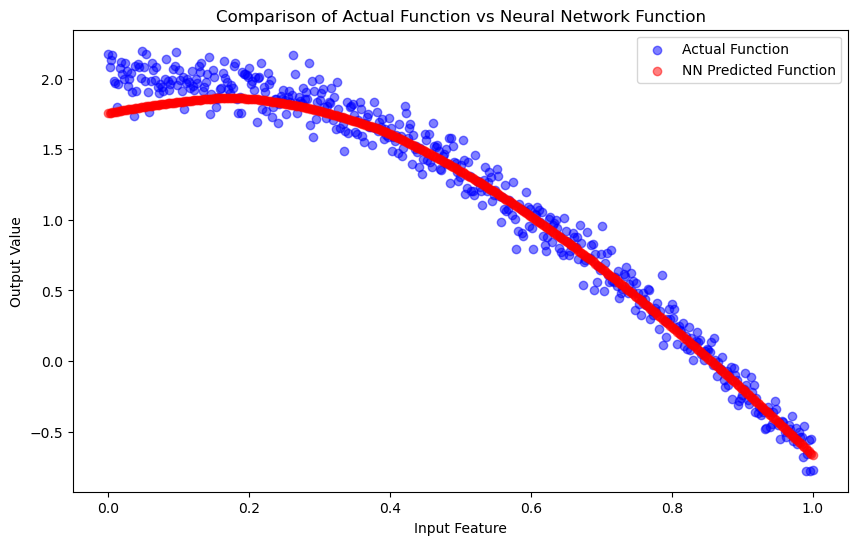

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming the model and x_test are already defined and the model is trained

# Generate new data points for a smooth curve
x_range = np.linspace(0, 1, 500)  # Generate 500 points between 0 and 1
x_range = np.column_stack([x_range, x_range**2, x_range**3, np.sin(x_range), np.cos(x_range)])  # Example transformations

# True function (assuming you know the true relationship)
def true_function(x):
    return 2*x[:, 0] - 3*x[:, 1] + 0.5*x[:, 2] - 1.5*x[:, 3] + 2*x[:, 4] + np.random.normal(0, 0.1, x.shape[0])

# Generate true values
y_true = true_function(x_range)

# Predict using the neural network
y_pred = model_pruned.predict(x_range)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_range[:, 0], y_true, color='blue', alpha=0.5, label='Actual Function')
plt.scatter(x_range[:, 0], y_pred, color='red', alpha=0.5, label='NN Predicted Function')
plt.title('Comparison of Actual Function vs Neural Network Function')
plt.xlabel('Input Feature')
plt.ylabel('Output Value')
plt.legend()
plt.show()

## PRUNING WITH ONLY TF

In [67]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import tensorflow_model_optimization as tfmot

# Create a simple neural network model for regression
model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(5,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Generate some synthetic data for training
np.random.seed(0)
x_train = np.random.rand(1000, 5)
y_train = 2*x_train[:, 0] - 3*x_train[:, 1] + 0.5*x_train[:, 2] - 1.5*x_train[:, 3] + 2*x_train[:, 4] + np.random.normal(0, 0.1, 1000)

x_test = np.random.rand(200, 5)
y_test = 2*x_test[:, 0] - 3*x_test[:, 1] + 0.5*x_test[:, 2] - 1.5*x_test[:, 3] + 2*x_test[:, 4] + np.random.normal(0, 0.1, 200)

# Apply pruning to the model
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.0,
        final_sparsity=0.5,
        begin_step=0,
        end_step=2000
    )
}

pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

pruned_model.compile(optimizer='adam', loss='mse')

# Define the callbacks for pruning
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir='./logs')  # Optional, for logging
]

# Train the pruned model
pruned_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=callbacks)

# Strip the pruning wrappers
pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Function to remove zero rows from dense layer weights
def remove_zero_rows(weights, biases):
    non_zero_rows = ~np.all(weights == 0, axis=1)
    return weights[non_zero_rows], biases[non_zero_rows]

# Rebuild the model with modified weights
new_model = models.Sequential()
input_shape = (5,)  # Initial input shape

for layer in pruned_model.layers:
    if isinstance(layer, layers.Dense):
        weights, biases = layer.get_weights()
        weights, biases = remove_zero_rows(weights, biases)
        
        new_layer = layers.Dense(weights.shape[1], activation=layer.activation, input_shape=input_shape)
        new_model.add(new_layer)
        new_layer.set_weights([weights, biases])
        
        input_shape = (weights.shape[1],)  # Update input shape for the next layer
    else:
        new_model.add(layer)

new_model.summary()

# Compile the new model
new_model.compile(optimizer='adam', loss='mse')

# Convert the optimized model to TensorFlow Lite with sparse tensor support
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Enable sparse tensor support
converter._experimental_sparsify_weights = True

tflite_model = converter.convert()

# Save the TFLite model
with open('optimized_pruned_regression.tflite', 'wb') as f:
    f.write(tflite_model)

with open('optimized_pruned_regression.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, 'optimized_pruned_regression'))

print("Model pruning and conversion to TFLite with sparse tensor support completed successfully.")


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                60        
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
 1/32 [..............................] - ETA: 27s - loss: 2.0171WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_train_batch_end` time: 0.0046s). Check your callbacks.


32/32 [==============================] - 1s 5ms/step - loss: 1.5811 - val_loss: 1.4159
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 1.3369 - val_loss: 1.2593
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1920 - val_loss: 1.0965
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0455 - val_loss: 0.9558
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.8963 - val_loss: 0.8055
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7472 - val_loss: 0.6564
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5930 - val_loss: 0.5125
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4554 - val_loss: 0.3843
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3335 - val_loss: 0.2767
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2274 - val_loss: 0.1859
Epoch 11/50
32/32 [===========

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 5